# Pair Programming Intro Machine Learning

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

In [122]:
# este DF extraido de Kaggle muestra las ventas de una cadena de supermercados estadounidense

sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales.csv")
sales.sample(7)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
4222,985,Louisiana,South,Small Market,67.0,70.0,126.0,48.0,25.0,13.0,851.0,80.0,70.0,90.0,160.0,3,10/01/11 00:00:00,Coffee,Decaf Irish Cream,Decaf
3489,805,California,West,Major Market,-116.0,-21.0,105.0,127.0,59.0,40.0,1215.0,-80.0,160.0,-30.0,130.0,1,05/01/11 00:00:00,Coffee,Amaretto,Regular
2682,661,California,West,Major Market,115.0,157.0,265.0,108.0,42.0,30.0,971.0,120.0,80.0,130.0,210.0,8,10/01/10 00:00:00,Herbal Tea,Chamomile,Decaf
1343,435,Utah,West,Small Market,36.0,58.0,97.0,39.0,22.0,10.0,799.0,50.0,30.0,60.0,90.0,4,05/01/10 00:00:00,Espresso,Caffe Latte,Regular
2646,650,California,West,Major Market,50.0,201.0,342.0,144.0,153.0,131.0,874.0,50.0,130.0,200.0,330.0,5,06/01/11 00:00:00,Espresso,Caffe Mocha,Regular
2629,646,New York,East,Major Market,-269.0,-52.0,68.0,121.0,133.0,109.0,1673.0,-180.0,110.0,-50.0,60.0,5,05/01/11 00:00:00,Espresso,Caffe Mocha,Regular
3145,740,Ohio,Central,Major Market,121.0,186.0,320.0,134.0,65.0,41.0,690.0,90.0,110.0,150.0,260.0,12,12/01/10 00:00:00,Tea,Earl Grey,Regular


### Partimos de la base de que nuestra variable respuesta va a ser "Profit".

# Objetivos

Los objetivos de hoy son:

 - Buscar un conjunto de datos a analizar:

Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Happy coding 📊📈📉

In [123]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [124]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,4248.0,582.278013,221.140310,203.0,417.00,573.0,772.0,985.0
Profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
Margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
COGS,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
Total Expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
Marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
Inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
Budget Profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
Budget COGS,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0


In [125]:
sales.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [126]:
sales.duplicated().sum()

0

In [127]:
# creamos un df solo con las columnas numéricas

sales_num = sales.select_dtypes(include=np.number)

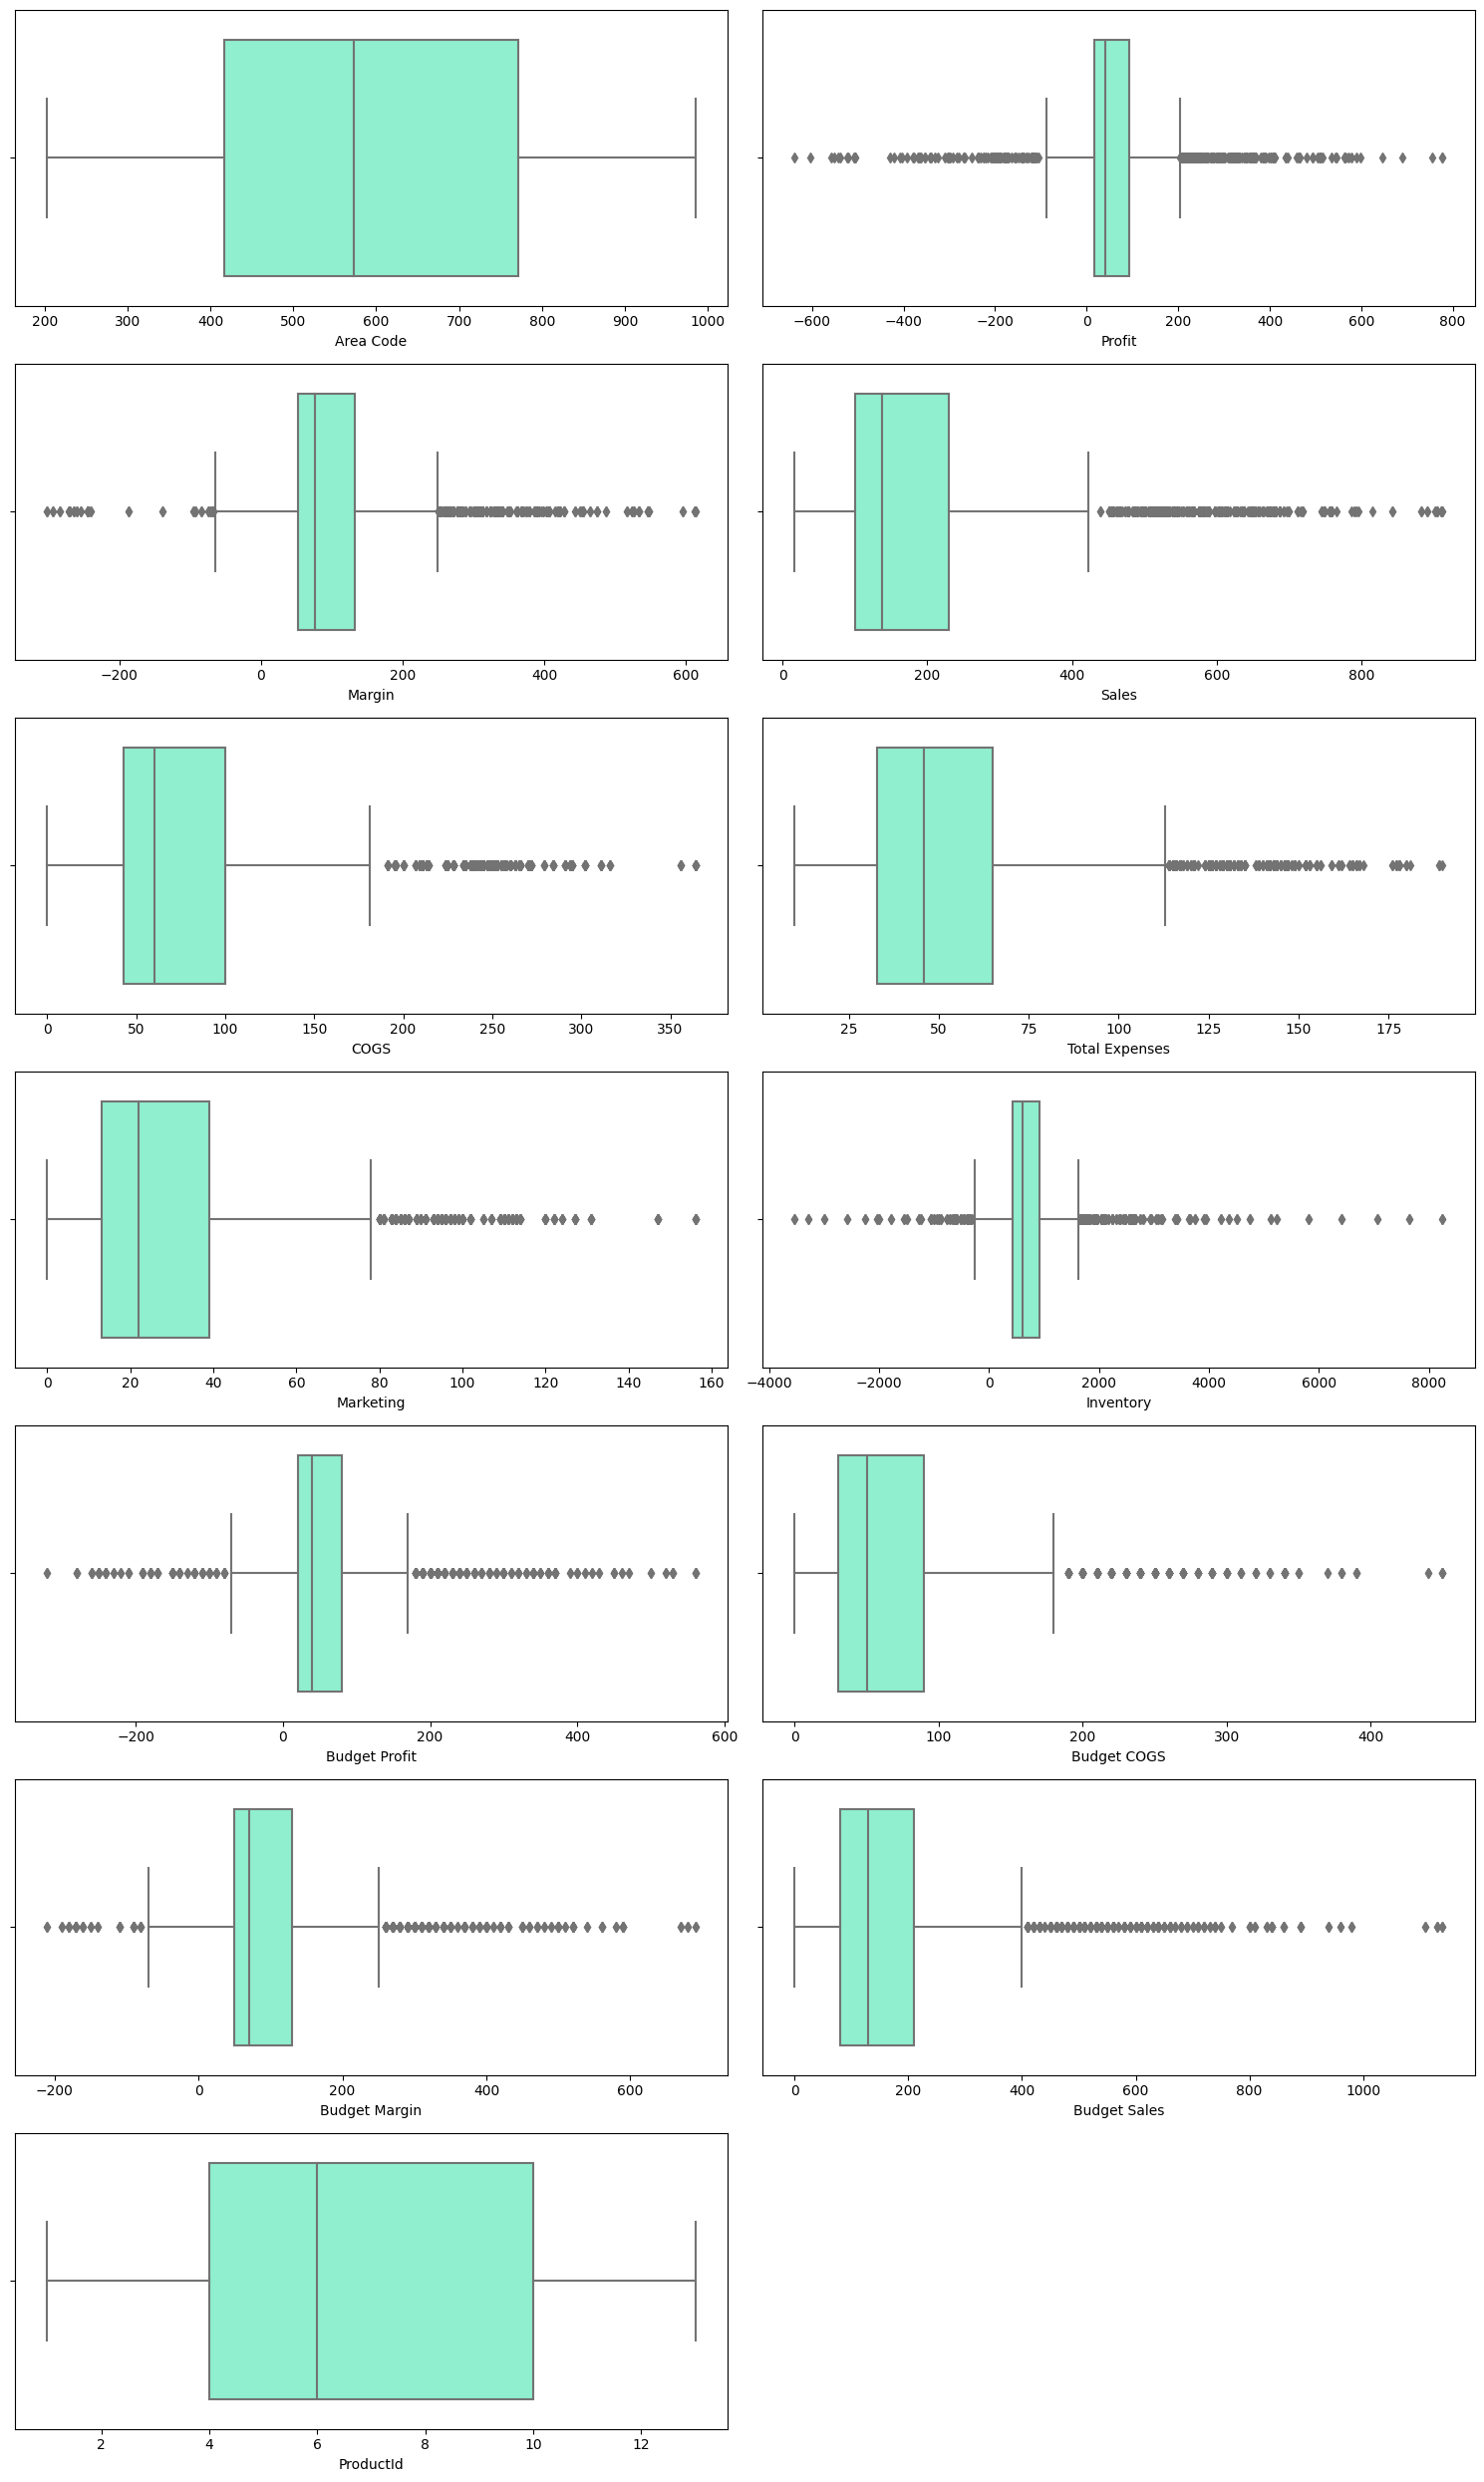

In [128]:
#detectamos outliers

fig, axes = plt.subplots(7, 2, figsize=(15,25))

axes = axes.flat

for i, col in enumerate(sales_num.columns):
    sns.boxplot(x = sales_num[col], data = sales_num, ax=axes[i], color = "aquamarine")

fig.delaxes(axes[-1])    
plt.tight_layout()
plt.show();

- Examinamos la columna "Profit" ya que es nuestra variable respuesta.

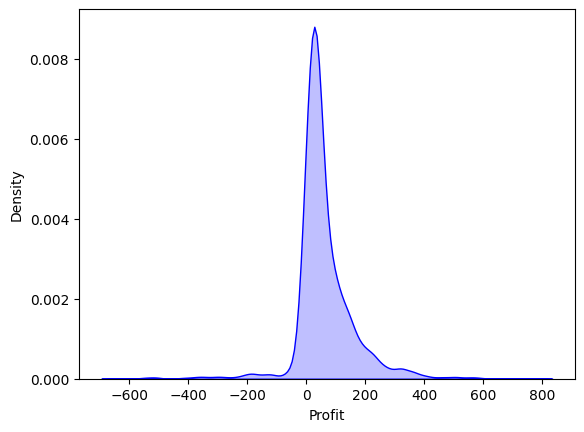

In [129]:
# vamos a ver como está distribuida nuestra variable respuesta

sns.distplot(
    sales["Profit"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [130]:
# identificamos los outliers 

def outliers (lista_col, df):

    dicc_ind = {}

    for col in lista_col:

        Q1 = np.nanpercentile(sales_num[col], 25)
        Q3 = np.nanpercentile(sales_num[col], 75)

        IQR = Q3-Q1

        outlier_step = 1.5*IQR

        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]

        if outliers_data.shape[0] > 0:
            
            dicc_ind[col] = (list(outliers_data.index))

    return dicc_ind

In [131]:
# creamos una lista con nuestras columnas numéricas

lista_col_num = list(sales_num.columns)
lista_col_num

['Area Code',
 'Profit',
 'Margin',
 'Sales',
 'COGS',
 'Total Expenses',
 'Marketing',
 'Inventory',
 'Budget Profit',
 'Budget COGS',
 'Budget Margin',
 'Budget Sales',
 'ProductId']

In [132]:
ind = outliers(lista_col_num, sales)

In [133]:
ind.keys()

dict_keys(['Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales'])

In [134]:
# sustituimos los outliers por la mediana

for k, v in ind.items():
    median = (sales[k]).median()
    for i in v:
        sales.loc[i,k] = median

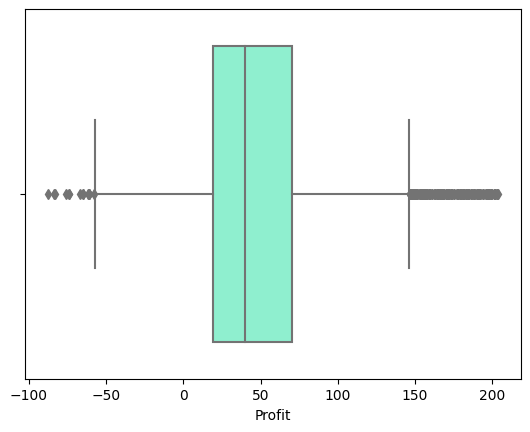

In [135]:
# comprobamos visualmente que los outliers para la columna "Profit" se han modificado por la mediana

sns.boxplot(x = sales["Profit"], data = sales, color = "aquamarine")

plt.show();

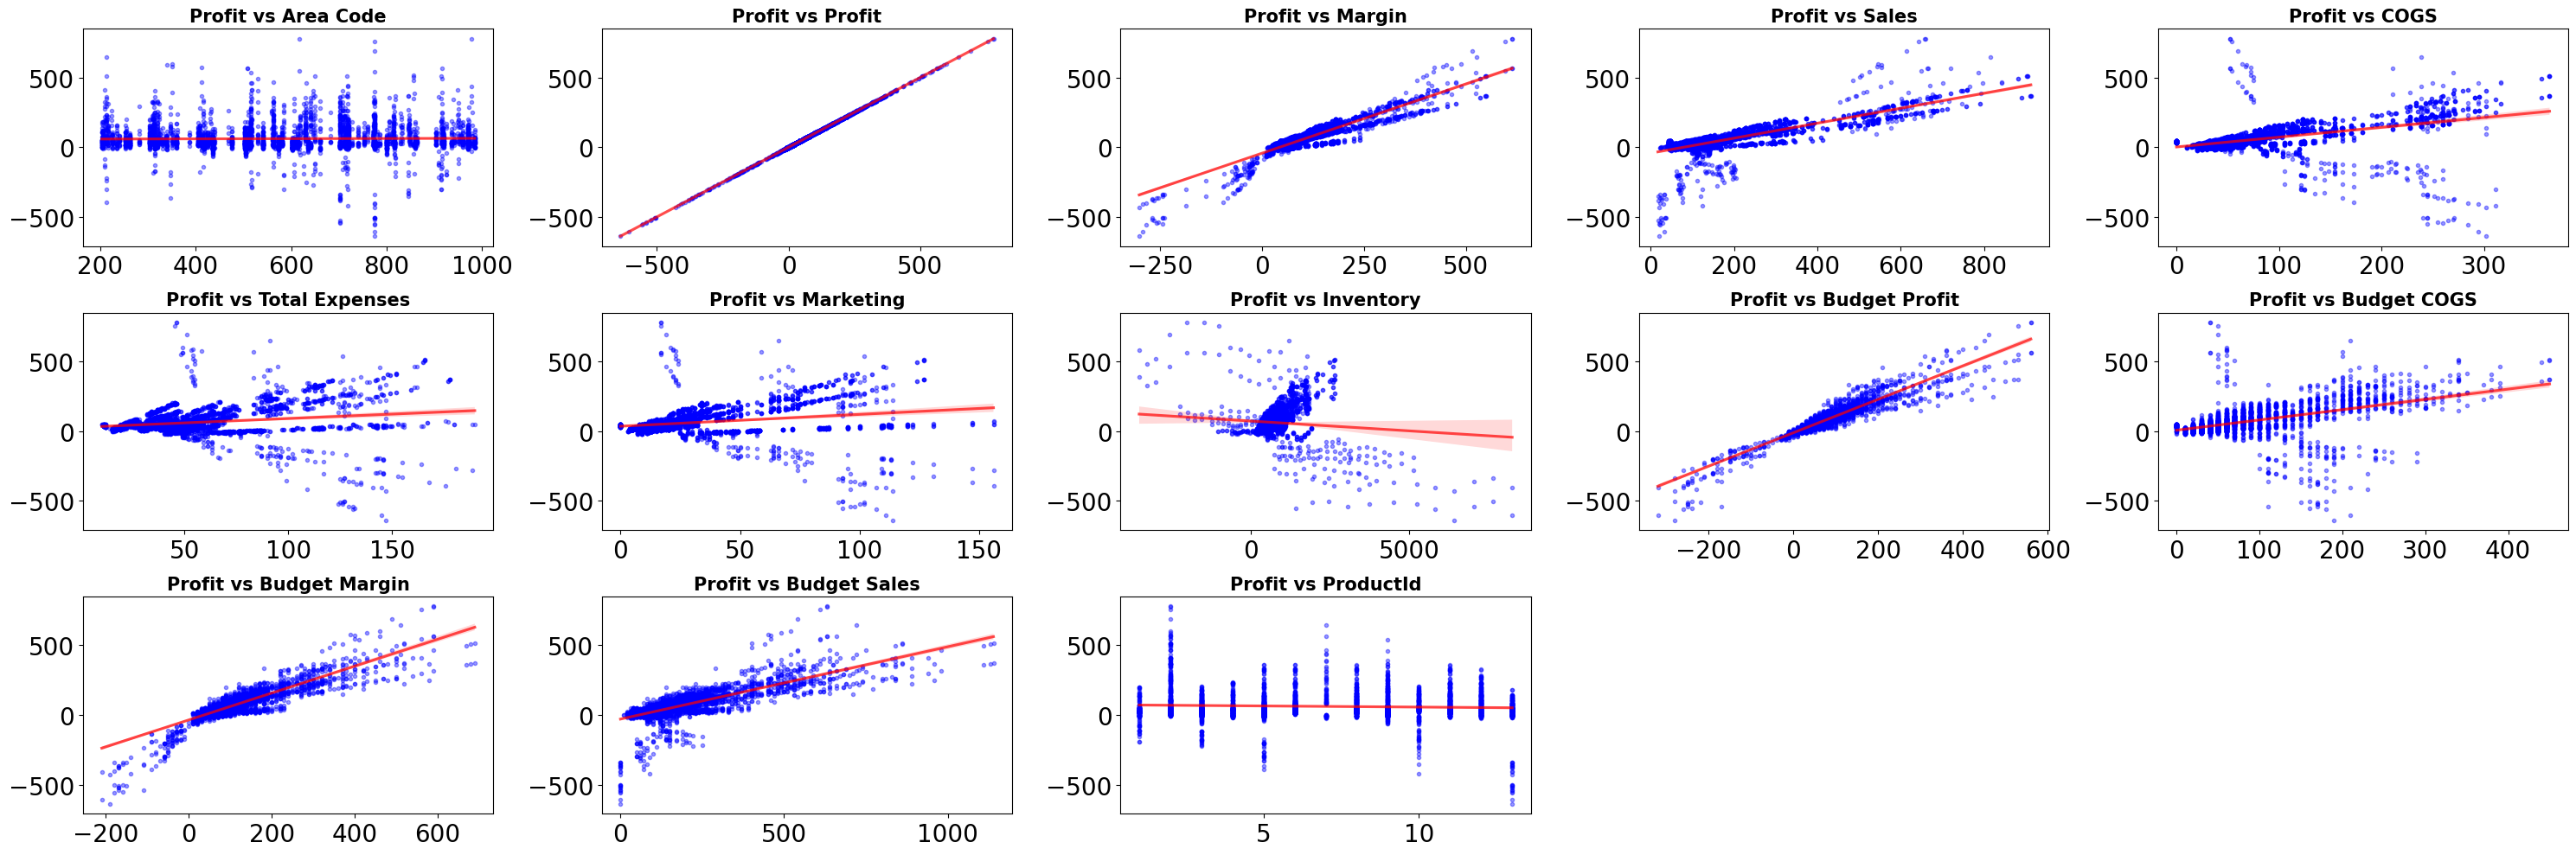

In [136]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# Queremos ver qué variables están más relacionadas con Sales
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))


axes = axes.flat

columnas_numeric = sales_num.columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = sales_num[colum], 
        y = sales_num["Profit"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Profit vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

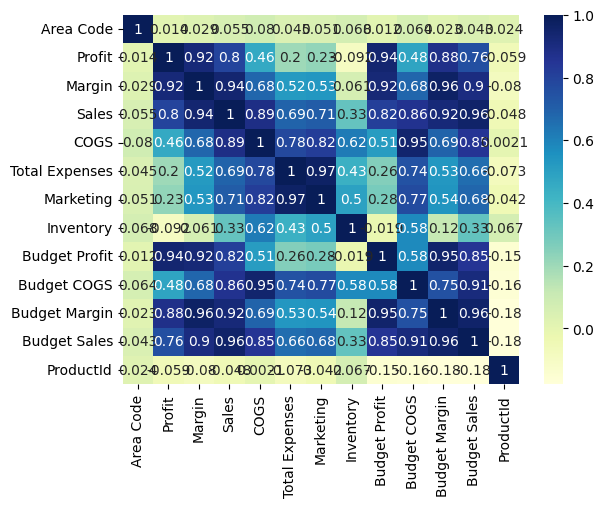

In [137]:
# hacemos un heatmap para observar la correlación entre todas las variables numéricas

sns.heatmap(sales_num.corr(), 
           cmap = "YlGnBu", 
           annot = True);

### Según nuestro EDA, concluimos que nuestras variables independientes o predictoras van a ser "Marketing" y "Sales". 

### El objetivo es predecir el beneficio sobre el gasto en márketing y las ventas.

In [138]:
sales.to_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv")